##### Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
rowdata=pd.read_csv('Mel_temp.csv')
rowdata.dtypes


Date             object
temperatures    float64
dtype: object

### Step 2: Convert Objects datatype to datetime type and float type

In [2]:
rowdata['Date'] = pd.to_datetime(rowdata['Date'],format='%m/%d/%Y')
rowdata['temperatures']=rowdata['temperatures'].astype(float)
rowdata.dtypes

Date            datetime64[ns]
temperatures           float64
dtype: object

#### Time Series #1: Date-Related Features

In [3]:
rowdata['Year']=rowdata['Date'].dt.year
rowdata['month']=rowdata['Date'].dt.month
rowdata['day']=rowdata['Date'].dt.day

rowdata['dayofweek_num']=rowdata['Date'].dt.dayofweek
# Weekname_name removed from current panda version
#rowdata['dayofweek_name']=rowdata['Datetime'].dt.start_time('%A') 
rowdata['ismonthstart']=rowdata['Date'].dt.is_month_start
rowdata['isyearstart']=rowdata['Date'].dt.is_year_start
rowdata['isquarterstart']=rowdata['Date'].dt.is_quarter_start
rowdata['isquarterend']=rowdata['Date'].dt.is_quarter_end
rowdata['isleapyear']=rowdata['Date'].dt.is_leap_year
rowdata.head()

,Date,temperatures,Year,month,day,dayofweek_num,ismonthstart,isyearstart,isquarterstart,isquarterend,isleapyear
0,1981-01-01,20.7,1981,1,1,3,True,True,True,False,False
1,1981-01-02,17.9,1981,1,2,4,False,False,False,False,False
2,1981-01-03,18.8,1981,1,3,5,False,False,False,False,False
3,1981-01-04,14.6,1981,1,4,6,False,False,False,False,False
4,1981-01-05,15.8,1981,1,5,0,False,False,False,False,False


#### Time Series #2: Lag Features

In [4]:
rowdata['lag_1']=rowdata['temperatures'].shift(1)
rowdata['lag_2']=rowdata['temperatures'].shift(2)
rowdata['lag_3']=rowdata['temperatures'].shift(3)
rowdata['lag_4']=rowdata['temperatures'].shift(4)
rowdata['lag_5']=rowdata['temperatures'].shift(5)
rowdata['lag_6']=rowdata['temperatures'].shift(6)
rowdata['lag_7']=rowdata['temperatures'].shift(7)
rowdata=rowdata[['Date','lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','temperatures']]
rowdata.head(15)

,Date,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,temperatures
0,1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7
1,1981-01-02,20.7,NaN,NaN,NaN,NaN,NaN,NaN,17.9
2,1981-01-03,17.9,20.7,NaN,NaN,NaN,NaN,NaN,18.8
3,1981-01-04,18.8,17.9,20.7,NaN,NaN,NaN,NaN,14.6
4,1981-01-05,14.6,18.8,17.9,20.7,NaN,NaN,NaN,15.8
5,1981-01-06,15.8,14.6,18.8,17.9,20.7,NaN,NaN,15.8
6,1981-01-07,15.8,15.8,14.6,18.8,17.9,20.7,NaN,15.8
7,1981-01-08,15.8,15.8,15.8,14.6,18.8,17.9,20.7,17.4
8,1981-01-09,17.4,15.8,15.8,15.8,14.6,18.8,17.9,21.8
9,1981-01-10,21.8,17.4,15.8,15.8,15.8,14.6,18.8,20.0


The partial autocorrelation function shows a high correlation with the first lag and lesser correlation with the second and third lag. The autocorrelation function shows a slow decay, which means that the future values have a very high correlation with its past values.

C:\Users\FADI\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


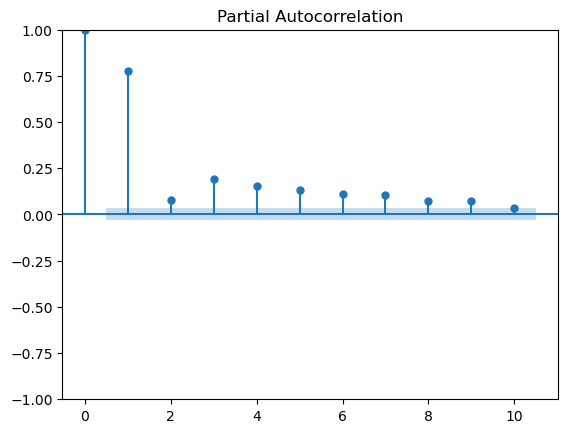

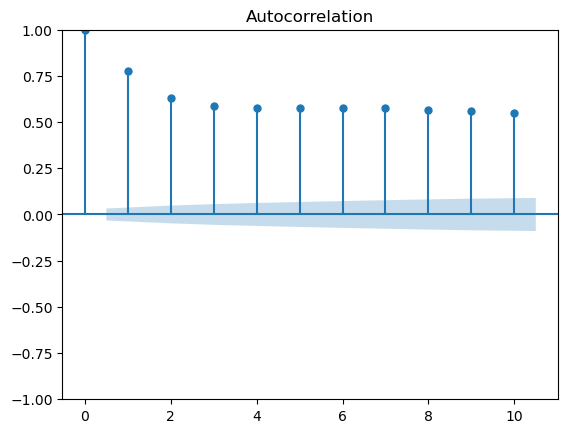

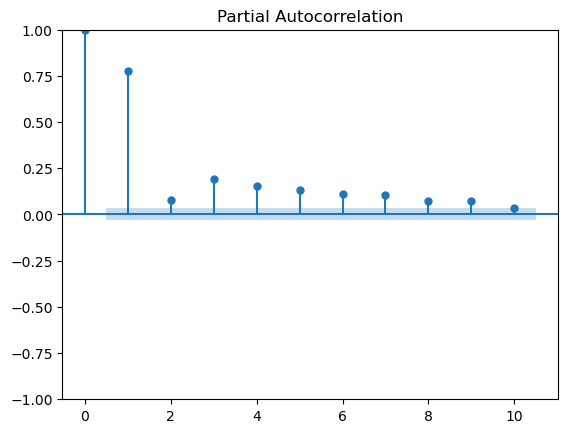

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(rowdata['temperatures'], lags=10)
plot_pacf(rowdata['temperatures'], lags=10)

#### Time Series #3: Rolling Window

We will select a window size, take the average of the values in the window, and use it as a feature

In [6]:
rowdata['rolling_mean']=rowdata['temperatures'].rolling(window=7).mean()
rowdata=rowdata[['Date','rolling_mean','temperatures']]
rowdata.head(15)

,Date,rolling_mean,temperatures
0,1981-01-01,NaN,20.7
1,1981-01-02,NaN,17.9
2,1981-01-03,NaN,18.8
3,1981-01-04,NaN,14.6
4,1981-01-05,NaN,15.8
5,1981-01-06,NaN,15.8
6,1981-01-07,17.057143,15.8
7,1981-01-08,16.585714,17.4
8,1981-01-09,17.142857,21.8
9,1981-01-10,17.314286,20.0


#### Time Series #4: Expanding Window Feature

In [7]:
rowdata['expanding_mean']=rowdata['temperatures'].expanding(2).mean()
rowdata=rowdata[['Date','temperatures','expanding_mean']]
rowdata.head(15)

,Date,temperatures,expanding_mean
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,19.300000
2,1981-01-03,18.8,19.133333
3,1981-01-04,14.6,18.000000
4,1981-01-05,15.8,17.560000
5,1981-01-06,15.8,17.266667
6,1981-01-07,15.8,17.057143
7,1981-01-08,17.4,17.100000
8,1981-01-09,21.8,17.622222
9,1981-01-10,20.0,17.860000


#### Step 3: Seperate dataset to trainnig and validation

In [8]:
rowdata['Date'].min(),rowdata['Date'].max(),(rowdata['Date'].max()-rowdata['Date'].min())

(Timestamp('1981-01-01 00:00:00'),
 Timestamp('1990-12-31 00:00:00'),
 Timedelta('3651 days 00:00:00'))

In [9]:
rowdata.index=rowdata.Date
Train_dataset=rowdata.loc['1981-01-01':'1987-12-01']
Validate_dataset=rowdata.loc['1987-12-02':'1990-12-31']



In [10]:
Train_dataset.shape, Validate_dataset.shape

((2525, 3), (1125, 3))

c:\Users\FADI\.conda\envs\time_series\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:21:28 - cmdstanpy - INFO - Chain [1] start processing
21:21:29 - cmdstanpy - INFO - Chain [1] done processing


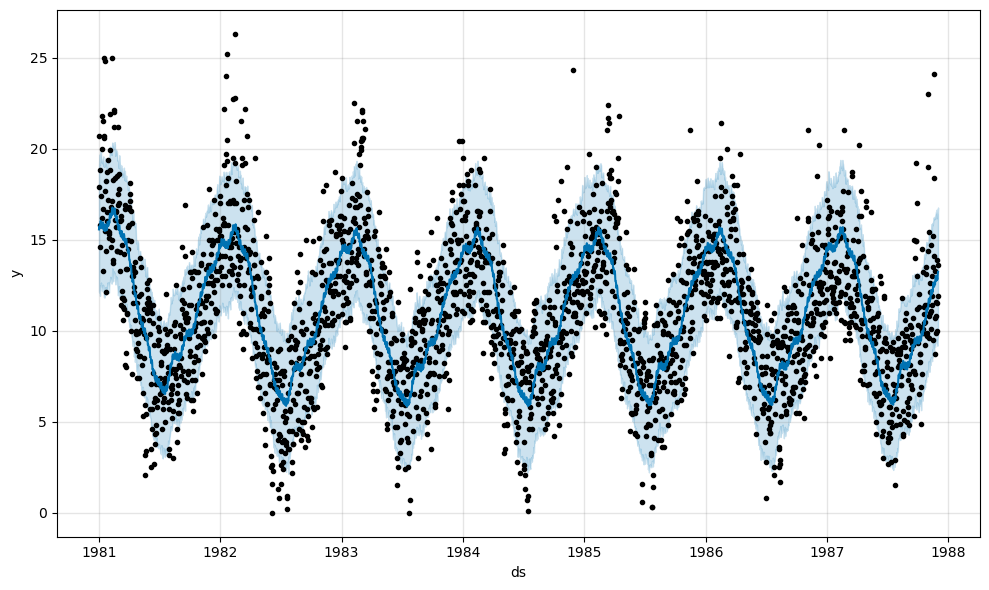

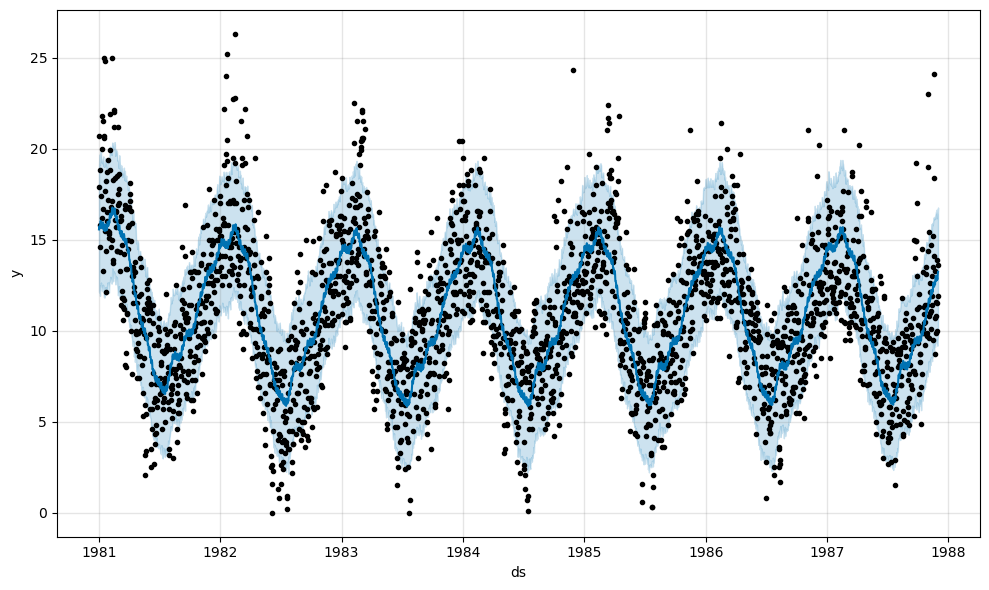

In [11]:
from prophet import Prophet
import matplotlib.pyplot as plt
Train_dataset=Train_dataset.rename(columns={'Date': 'ds', 'temperatures': 'y'})
Validate_dataset=Train_dataset.rename(columns={'Date': 'ds', 'temperatures': 'y'})
model = Prophet()
model.fit(Train_dataset)
future=model.make_future_dataframe(periods=30)
forecast = model.predict(Validate_dataset)
model.plot(forecast)

21:21:30 - cmdstanpy - INFO - Chain [1] start processing
21:21:31 - cmdstanpy - INFO - Chain [1] done processing


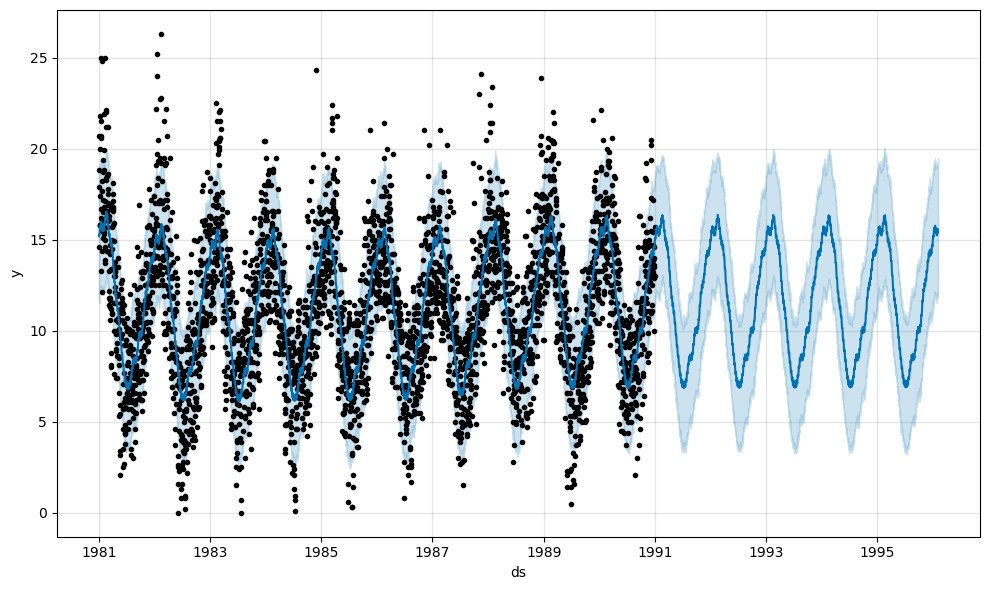

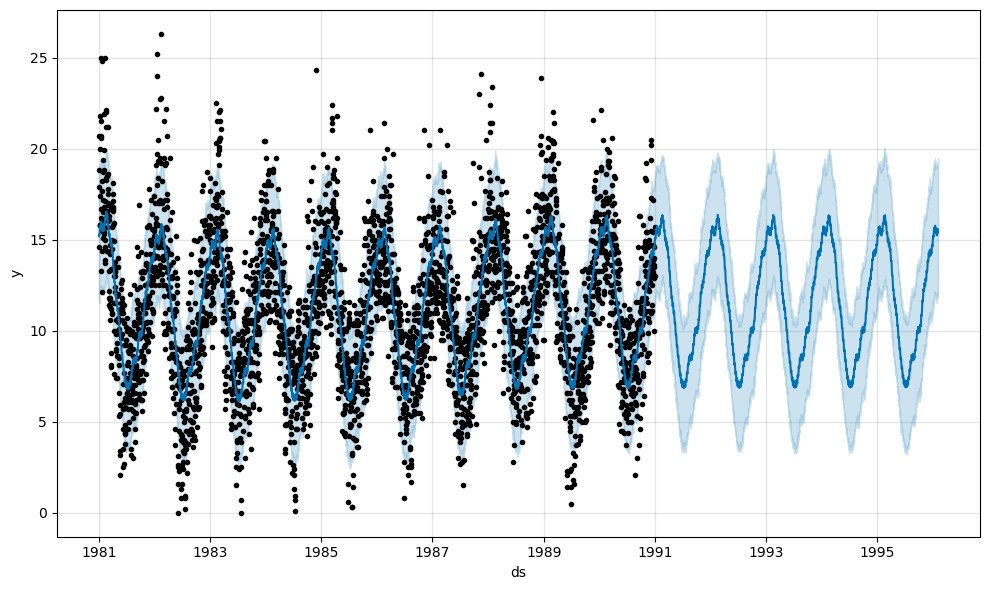

In [12]:
from prophet import Prophet
import matplotlib.pyplot as plt
rowdata=rowdata.rename(columns={'Date': 'ds', 'temperatures': 'y'})
model = Prophet()
model.fit(rowdata)
future=model.make_future_dataframe(periods=1862)
forecast = model.predict(future)
model.plot(forecast)


Model Evaluation

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(rowdata['y'],forecast['yhat'][-len(rowdata):])
mse=mean_squared_error(rowdata['y'],forecast['yhat'][-len(rowdata):])
rmse=np.sqrt(mse)
print('Mean_absolute_erro:',mae)
print('Root_mean_squared_error:',rmse)

Mean_absolute_erro: 2.7126463873800244
Root_mean_squared_error: 3.3820049998369544


To see the forecast compoent

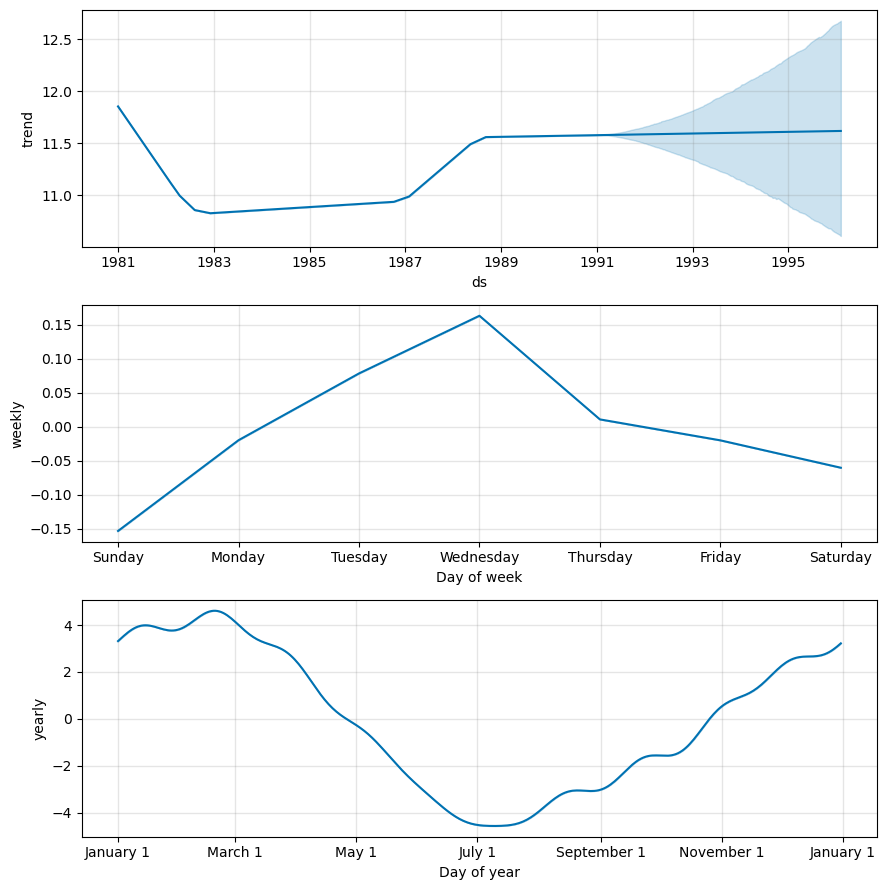

In [14]:
fig2 = model.plot_components(forecast)

In [15]:
from prophet.plot import plot_plotly, plot_components_plotly

In [16]:
plot_plotly(model, forecast)

In [17]:
plot_components_plotly(model, forecast)